In [1]:
### import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, accuracy_score


In [2]:
#Load data
def load_data():
    data = pd.read_csv('heart.csv')
    y = data["target"]
    X = data.drop('target',axis=1)
    #Plotting detail dataset
    data.hist(figsize=(20,30))
    return X,y

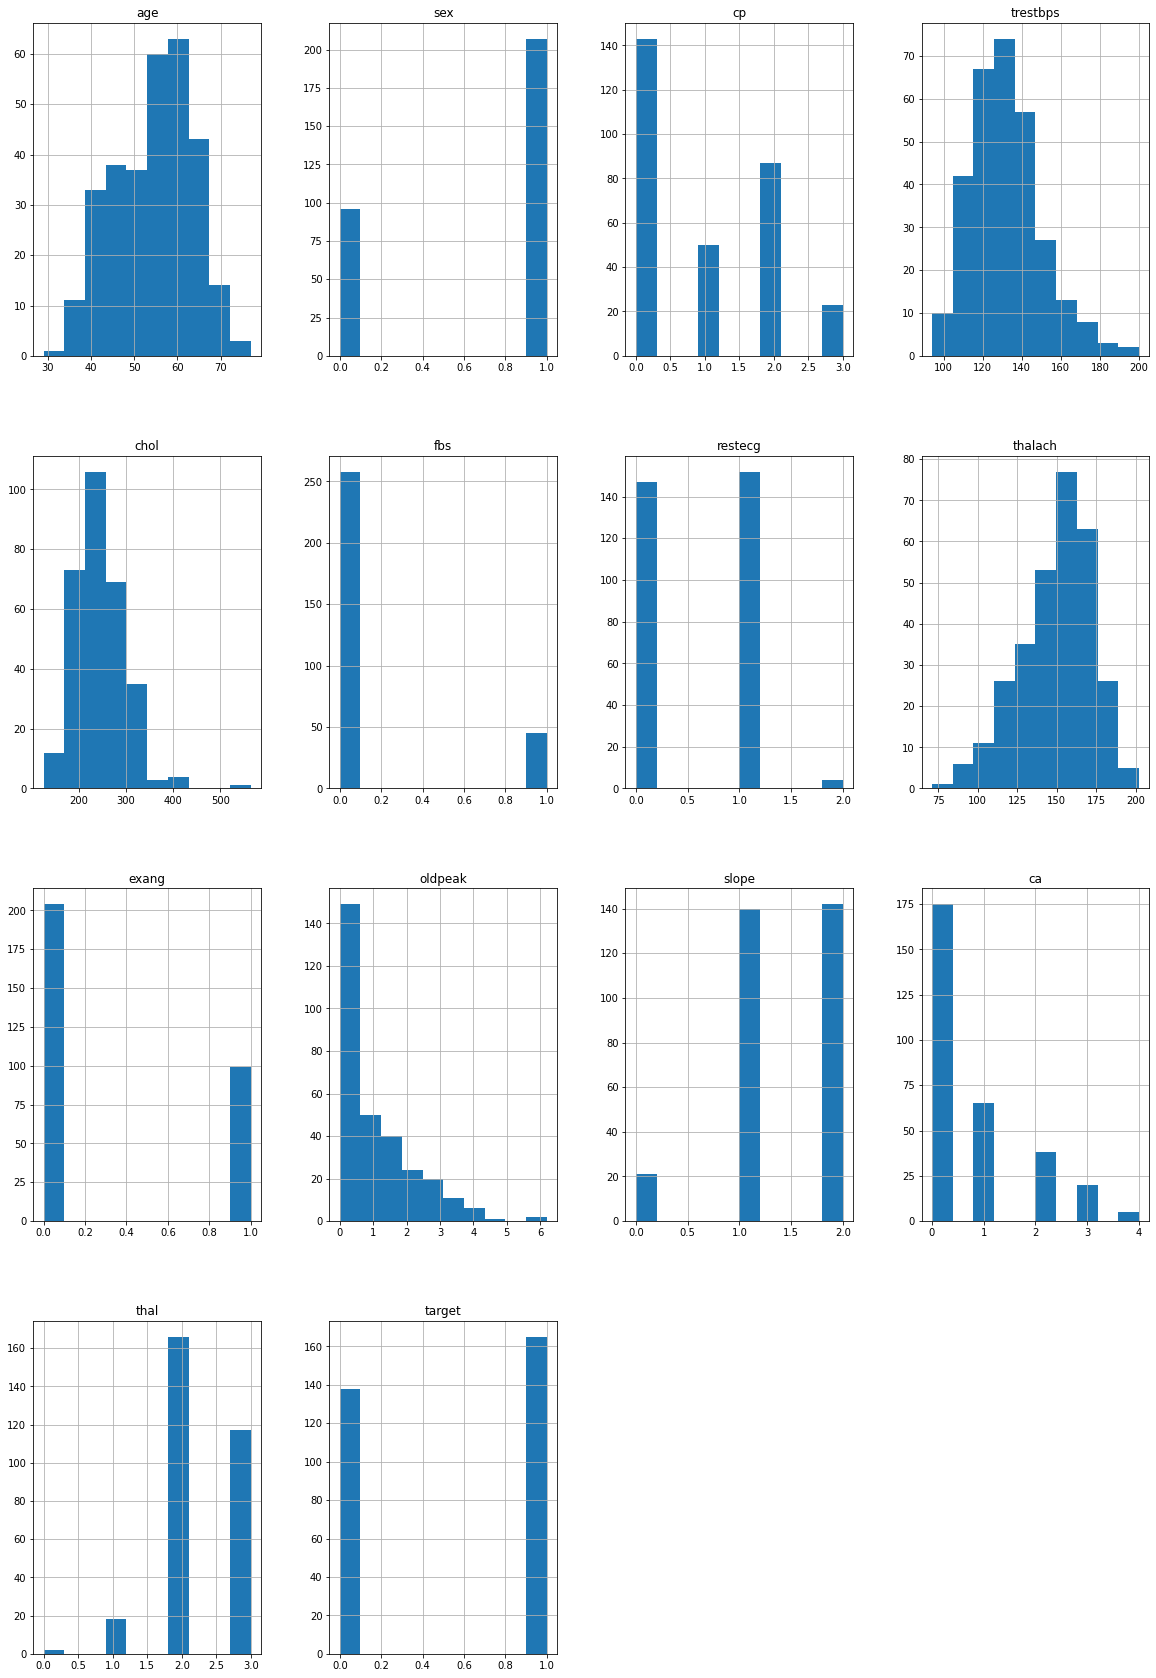

In [3]:
inputs,target = load_data()

In [4]:
#SPLITTING DATA train 80 test 20
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.20, random_state = 0)

In [5]:
#PREPROCESSING
#Using standard scaler

def pre_process(X_train,X_test):
    scaler = StandardScaler()
    from sklearn.preprocessing import MinMaxScaler
    mins = MinMaxScaler()
    X_train = mins.fit_transform(X_train)
    X_test = mins.fit_transform(X_test)
    return X_train,X_test
X_train,X_test = pre_process(X_train,X_test)

In [6]:
#Import KNN library
from sklearn.neighbors import KNeighborsClassifier
#Choose 10 neighbors beside of 11.. 
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
# print(X_train.shape)
# print(X_test.shape)
# print(test.shape)

#Predict from test data
knn_predicted = knn.predict(X_test)
print(knn_predicted)
#Create confusion matrix
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
#Find the accuracy
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')


[0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 0 0
 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1]
confussion matrix
[[23  4]
 [ 5 29]]


Accuracy of K-NeighborsClassifier: 85.24590163934425 



In [7]:
#Using cross validation

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
mins  = MinMaxScaler(inputs)
# inputs = scaler.fit_transform(inputs)
score = cross_val_score(knn, inputs, target,cv=5)
print(f"Cross Validation Accuracy: {score.mean()*100}")

Cross Validation Accuracy: 63.04918032786886


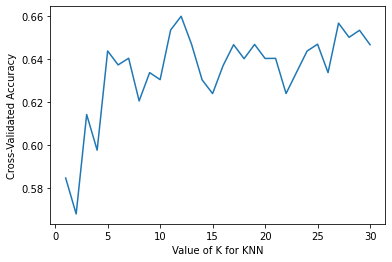

In [8]:
import matplotlib.pyplot as plt
k_range = range(1, 31)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, inputs, target, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [9]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

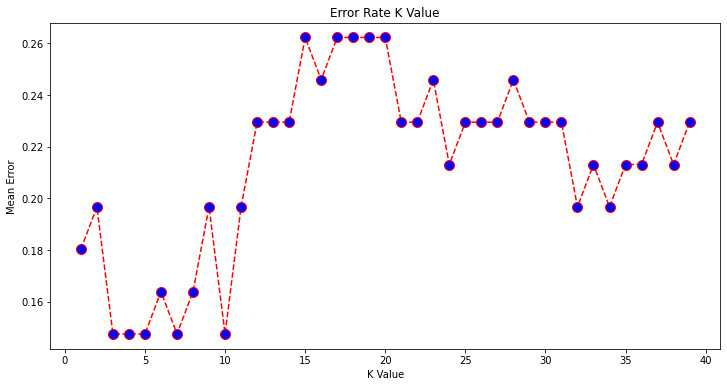

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')